# Drawing Conclusions Quiz
Use the space below to explore `store_data.csv` to answer the quiz questions below.

In [32]:
# Do your analysis and answer the following (type your answers !! do not throw the code in there and submit the file)

# Which store has the highest total sales for the final month of data? StoreA
# Which store makes the most sales on average? storeB
# Which store sells the most during the week of March 13th, 2016? storeD
# In what week does store C make its worst sales? 2014-07-06
# Which store has the most sales in the latest 3-month period? storeA
# What is the most consistent store in sales ? storeB 
# Given the information you gathered, what do you think is the best store financially? storeB

In [33]:
# import and load the data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import datetime as dt
storeData = pd.read_csv('store_data.csv')
storeData.week.sort_values()

0      2014-05-04
1      2014-05-11
2      2014-05-18
3      2014-05-25
4      2014-06-01
          ...    
195    2018-01-28
196    2018-02-04
197    2018-02-11
198    2018-02-18
199    2018-02-25
Name: week, Length: 200, dtype: object

In [34]:
# explore the data (gather as much information as you can)
storeData.tail()

,week,storeA,storeB,storeC,storeD,storeE
195,2018-01-28,282,6351,7759,5558,1028
196,2018-02-04,4853,6503,4187,5956,1458
197,2018-02-11,9202,3677,4540,6186,243
198,2018-02-18,3512,7511,4151,5596,3501
199,2018-02-25,7560,6904,3569,5045,2585


In [35]:
storeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   week    200 non-null    object
 1   storeA  200 non-null    int64 
 2   storeB  200 non-null    int64 
 3   storeC  200 non-null    int64 
 4   storeD  200 non-null    int64 
 5   storeE  200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [36]:
storeData.shape

(200, 6)

In [37]:
# clean the data
storeData.isnull().sum()

week      0
storeA    0
storeB    0
storeC    0
storeD    0
storeE    0
dtype: int64

In [38]:
storeData.duplicated().sum()

0

In [39]:
# total sales for the last month
storeData.week = pd.to_datetime(storeData.week)
storeData.tail()


,week,storeA,storeB,storeC,storeD,storeE
195,2018-01-28,282,6351,7759,5558,1028
196,2018-02-04,4853,6503,4187,5956,1458
197,2018-02-11,9202,3677,4540,6186,243
198,2018-02-18,3512,7511,4151,5596,3501
199,2018-02-25,7560,6904,3569,5045,2585


In [53]:
storeData.loc[storeData.week >= pd.to_datetime('2018-2'), :].sum().sort_values(ascending=False)

storeA    25127
storeB    24595
storeD    22783
storeC    16447
storeE     7787
dtype: int64

In [50]:
# average sales
storeData.agg('mean').sort_values(ascending=False)

storeB    6756.710
storeA    5865.480
storeD    5431.405
storeC    4942.105
storeE    2580.025
dtype: float64

In [42]:
# sales on march 13, 2016
storeData.loc[storeData['week'] == pd.to_datetime('2016-3-13')]

,week,storeA,storeB,storeC,storeD,storeE
97,2016-03-13,2054,1390,5112,5513,2536


In [43]:
# worst week for store C
storeData.loc[storeData['storeC'].idxmin(), 'week']

Timestamp('2014-07-06 00:00:00')

In [55]:
# total sales during most recent 3 month period
storeData.week = storeData.week.sort_values()
storeData.loc[storeData.week >= pd.to_datetime('2017-12-1'), :].sum().sort_values(ascending=False)


storeA    87591
storeB    79394
storeD    75190
storeC    66538
storeE    27334
dtype: int64

In [45]:
# Go back to the top and answer the questions

<AxesSubplot:>

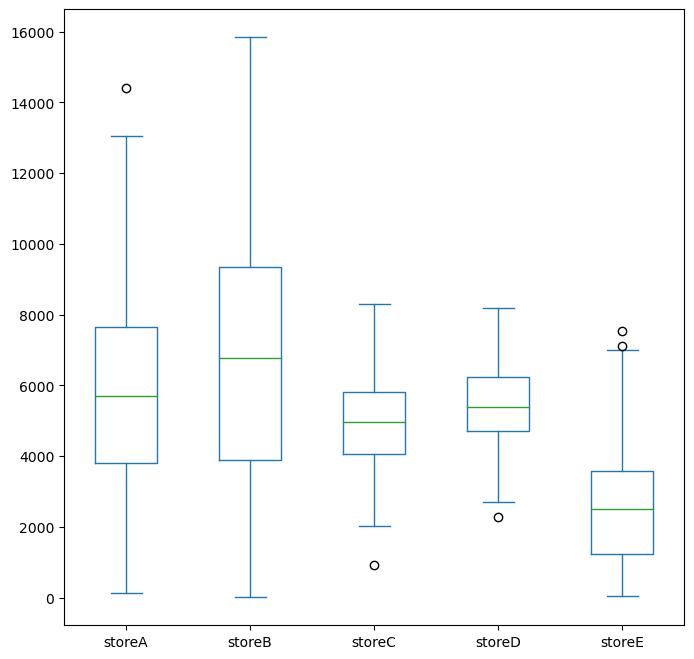

In [46]:
%matplotlib inline
storeData.plot(kind='box', figsize= (8, 8))